## Notebook to test Joonhoon's optlang translation with Ropaccus GSM and Yoneda and Henson Data 

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import cobra
%matplotlib inline
from matplotlib import pyplot as plt

##### **Load data**

In [3]:
# from edd_utils import login, export_study, export_metadata
# # Study to Download
# study_slug = 'input-test-study'#multiomics-data-for-wt-strain-c157'
# # EDD server
# edd_server = 'public-edd.agilebiofoundry.org'#'edd.jbei.org'
# user       = 'schenkch'#cschenk@bcamath.org'#'schenkch'

In [4]:
# session = login(edd_server=edd_server, user=user)

In [5]:
# df = export_study(session, study_slug, edd_server=edd_server)
# df.head()

In [10]:
dataDir =  '../../EDD_Henson_data'
dataTransDir = '../winston_data/henson'
Transfile = os.path.join(dataTransDir, 'henson_reprocess_FKPM_melted.csv')
ODfile = os.path.join(dataDir, 'Henson_ODD_data.csv')
#Subfile = os.path.join(dataDir, 'Yoneda_set2_Metabolomics_data.csv')

OD = pd.read_csv(ODfile)
Trans = pd.read_csv(Transfile)
display(Trans)
#OD['Biomass Conc'] = GRAMS_BIOMASS_PER_LITER_PER_OD*OD['Value']
#Sub = pd.read_csv(Subfile)

,Strain,variable,Condition,Replicate,value,Units
0,3A,WP_000104864.1,1g/L_glucose,1,0.000000,FKPM
1,3A,WP_000104864.1,1g/L_glucose,2,0.000000,FKPM
2,3A,WP_000104864.1,1g/L_glucose,3,0.000000,FKPM
3,3B,WP_000104864.1,0.75g/L_phenol,1,0.000000,FKPM
4,3B,WP_000104864.1,0.75g/L_phenol,2,0.000000,FKPM
5,3B,WP_000104864.1,0.75g/L_phenol,3,0.000000,FKPM
6,3C,WP_000104864.1,1.5g/L_phenol,1,0.000000,FKPM
7,3C,WP_000104864.1,1.5g/L_phenol,2,0.000000,FKPM
8,3C,WP_000104864.1,1.5g/L_phenol,3,0.000000,FKPM
9,4A,WP_000104864.1,1g/L_glucose,1,0.000000,FKPM


##### **Load Genome Scale Model**

In [12]:
file_name =  '../GSMs/Ropacus_annotated_curated_with_phenol_custom_biomass.xml'
model = cobra.io.read_sbml_model(file_name)

In [13]:
model.reactions[1000].gene_reaction_rule

'WP_005251305_1'

##### **Import Joonhoons Code**

In [15]:
OptlangDir = '../EFLUX2_SPOT'
sys.path.append(OptlangDir)
from eflux2 import EFlux2
from spot_cplex import SPOT #spot not working yet because quadratic constraints not supported yet

In [16]:
#WT-G-R1 Strain
WTGR1_Trans = Trans[Trans['Line Name'] == 'WT-G-R1']
#WT-G-R2 Strain
WTGR2_Trans = Trans[Trans['Line Name'] == 'WT-G-R2']
#WT-L-R1 Strain
WTLR1_Trans = Trans[Trans['Line Name'] == 'WT-L-R1']
#WT-L-R2 Strain
WTLR2_Trans = Trans[Trans['Line Name'] == 'WT-L-R2']
#WT-H-R1 Strain
WTHR1_Trans = Trans[Trans['Line Name'] == 'WT-H-R1']
#WT-H-R2 Strain
WTHR2_Trans = Trans[Trans['Line Name'] == 'WT-H-R2']
#EVOL33-G-R1 Strain
EVOL33GR1_Trans = Trans[Trans['Line Name'] == 'EVOL33-G-R1']
#EVOL33-G-R2 Strain
EVOL33GR2_Trans = Trans[Trans['Line Name'] == 'EVOL33-G-R2']
#EVOL33-L-R1 Strain
EVOL33LR1_Trans = Trans[Trans['Line Name'] == 'EVOL33-L-R1']
#EVOL33-L-R2 Strain
EVOL33LR2_Trans = Trans[Trans['Line Name'] == 'EVOL33-L-R2']
#EVOL33-H-R1 Strain
EVOL33HR1_Trans = Trans[Trans['Line Name'] == 'EVOL33-H-R1']
#EVOL33-L-R2 Strain
EVOL33HR2_Trans = Trans[Trans['Line Name'] == 'EVOL33-H-R2']
#EVOL40-G-R1 Strain
EVOL40GR1_Trans = Trans[Trans['Line Name'] == 'EVOL40-G-R1']
#EVOL40-G-R2 Strain
EVOL40GR2_Trans = Trans[Trans['Line Name'] == 'EVOL40-G-R2']
#EVOL40-L-R1 Strain
EVOL40LR1_Trans = Trans[Trans['Line Name'] == 'EVOL40-L-R1']
#EVOL40-L-R2 Strain
EVOL40LR2_Trans = Trans[Trans['Line Name'] == 'EVOL40-L-R2']
#EVOL40-H-R1 Strain
EVOL40HR1_Trans = Trans[Trans['Line Name'] == 'EVOL40-H-R1']
#EVOL40-H-R2 Strain
EVOL40HR2_Trans = Trans[Trans['Line Name'] == 'EVOL40-H-R2']

KeyError: 'Line Name'

In [13]:
#WT-G-R1 Strain
WTGR1_OD = OD[OD['Line Name'] == 'WT-G-R1']
#WT-G-R2 Strain
WTGR2_OD = OD[OD['Line Name'] == 'WT-G-R2']
#WT-L-R1 Strain
WTLR1_OD = OD[OD['Line Name'] == 'WT-L-R1']
#WT-L-R2 Strain
WTLR2_OD = OD[OD['Line Name'] == 'WT-L-R2']
#WT-H-R1 Strain
WTHR1_OD = OD[OD['Line Name'] == 'WT-H-R1']
#WT-H-R2 Strain
WTHR2_OD = OD[OD['Line Name'] == 'WT-H-R2']
#EVOL33-G-R1 Strain
EVOL33GR1_OD = OD[OD['Line Name'] == 'EVOL33-G-R1']
#EVOL33-G-R2 Strain
EVOL33GR2_OD = OD[OD['Line Name'] == 'EVOL33-G-R2']
#EVOL33-L-R1 Strain
EVOL33LR1_OD = OD[OD['Line Name'] == 'EVOL33-L-R1']
#EVOL33-L-R2 Strain
EVOL33LR2_OD = OD[OD['Line Name'] == 'EVOL33-L-R2']
#EVOL33-H-R1 Strain
EVOL33HR1_OD = OD[OD['Line Name'] == 'EVOL33-H-R1']
#EVOL33-L-R2 Strain
EVOL33HR2_OD = OD[OD['Line Name'] == 'EVOL33-H-R2']
#EVOL40-G-R1 Strain
EVOL40GR1_OD = OD[OD['Line Name'] == 'EVOL40-G-R1']
#EVOL40-G-R2 Strain
EVOL40GR2_OD = OD[OD['Line Name'] == 'EVOL40-G-R2']
#EVOL40-L-R1 Strain
EVOL40LR1_OD = OD[OD['Line Name'] == 'EVOL40-L-R1']
#EVOL40-L-R2 Strain
EVOL40LR2_OD = OD[OD['Line Name'] == 'EVOL40-L-R2']
#EVOL40-H-R1 Strain
EVOL40HR1_OD = OD[OD['Line Name'] == 'EVOL40-H-R1']
#EVOL40-H-R2 Strain
EVOL40HR2_OD = OD[OD['Line Name'] == 'EVOL40-H-R2']

#### **EFLUX2 Solution**

In [14]:
display(WTLR1_Trans)

,Line Name,Measurement Type,Time,Value,Units
8939,WT-L-R1,PD630_LPD06575,24,4260249,counts
8940,WT-L-R1,PD630_LPD06576,24,29929271,counts
8941,WT-L-R1,PD630_LPD00131,24,3611107,counts
8942,WT-L-R1,PD630_LPD06740,24,188041,counts
8943,WT-L-R1,PD630_LPD06741,24,661317,counts
8944,WT-L-R1,PD630_LPD06742,24,121540,counts
8945,WT-L-R1,PD630_LPD07170,24,176720,counts
8946,WT-L-R1,PD630_LPD00130,24,48309,counts
8947,WT-L-R1,PD630_LPD07169,24,152198,counts
8948,WT-L-R1,PD630_LPD07168,24,1305,counts


In [15]:
import numpy as np
from optlang.symbolics import add

def EFlux2(model, Transcriptomics):
    eflux2_model = model.copy()
    # Parse GPR into a dict containing isozymes (separated by 'or')
    # Each isozyme has a set of subunits (separated by 'and')
    gpr_dict = dict()
    for r in eflux2_model.reactions:
        if r.gene_reaction_rule:
            temp = set()
            for x in [x.strip('() ') for x in r.gene_reaction_rule.split(' or ')]:
                temp.add(frozenset(y.strip('() ') for y in x.split(' and ')))
            gpr_dict[r.id] = temp
    # Set the bounds using the transcriptomics data
    for r in eflux2_model.reactions:
        if r.gene_reaction_rule:
            t = np.sum([np.min([Transcriptomics.loc[g] if g in Transcriptomics.index 
                                else np.array([np.Inf]) for g in p])
                        for p in gpr_dict[r.id]])
            if r.lower_bound < 0.0:
                r.lower_bound = -t
            else:
                #print(r.lower_bound)
                pass
            if r.upper_bound > 0.0:
                r.upper_bound = t
            else:
                #print(r.upper_bound)
                pass
        else:
            if r.lower_bound <= -1000.0:
                r.lower_bound = -np.Inf
            if r.upper_bound >= 1000.0:
                r.upper_bound = np.Inf
    # solve FBA to calculate the maximum biomass
    eflux2_model.tolerance = 1e-9
    fba_sol = eflux2_model.optimize()
    print('FBA status', fba_sol.status)
    print('FBA solution', fba_sol.objective_value)
    # Constrain the biomass to the optimal value
    for r in eflux2_model.reactions:
        if r.objective_coefficient:
            r.lower_bound = fba_sol.objective_value
    # minimize the sum of squared flux values
    eflux2_model.objective = eflux2_model.problem.Objective(add([r.flux_expression**2 for r in eflux2_model.reactions]), direction='min')
    eflux2_sol = eflux2_model.optimize()
    print('EFlux2 status', eflux2_sol.status)
    print('EFlux2 solution', eflux2_sol.objective_value)
    # return eflux2 solution
    return(eflux2_sol)

In [29]:
# eflux2sol = []
# for i in range(0,len(WTLR1_Trans)):
#     eflux2sol[i] = EFlux2(model, WTLR1_Trans[])
eflux2sol = EFlux2(model, WTLR1_Trans)
display(eflux2sol)

FBA status optimal
FBA solution 0.7916218813167172
EFlux2 status optimal
EFlux2 solution 8305.677394207085


,fluxes,reduced_costs
12DGR120tipp,0.000000,4639.802634
12DGR140tipp,0.000000,4639.802634
12DGR141tipp,0.000000,0.000000
12DGR161tipp,0.000000,0.000000
12DGR180tipp,0.000000,0.000000
...,...,...
sink_bmocogdp_c,0.000000,55381.015015
sink_lipopb_c,0.000000,0.000000
sink_sheme_c,0.000000,3779.427471
Growth,0.791622,130831.827962


#### **SPOT Solution**

In [17]:
spotsol = SPOT(model, WTLR1_Trans)
display(spotsol)

12DGR120tipp       0.000644
12DGR140tipp       0.000644
12DGR141tipp       0.000644
12DGR161tipp       0.000644
12DGR180tipp       0.000644
                     ...   
sink_bmocogdp_c    0.000071
sink_lipopb_c      0.000240
sink_sheme_c       0.000137
Growth             0.000833
ATPM               0.000476
Length: 2380, dtype: float64

#### **Plot solutions: Comparison of SPOT and EFLUX2 solution**

In [18]:
eflux2solfluxes = eflux2sol.fluxes

In [19]:
rxns = [r.id for r in model.reactions]
EFlux2_fluxdict = dict(zip(rxns,eflux2solfluxes.to_numpy()))#replace previous .get_values()
SPOT_fluxdict = dict(zip(rxns,spotsol.to_numpy()))#replace previous .get_values()
#display(SPOT_fluxdict)

##### **Load 13cdata** But which dataset to use????? Here just copied from other notebook

In [20]:
# Ishii flux data, WT reference strain [mmol/gDW/h]: http://ecoli.iab.keio.ac.jp/ > Fluxome > Fluxome data
reactionDict = {'PGI':2076,'PFK':2063,'FBA':1150,'TPI':2455,'PYK':2265,'PDH':2046,'GND':1422,'RPE':2311,'RPI':2312,'TALA':2397,'ICL':1551,'MALS':1713}
ishiiDict = {2076:2.247179186,2063:2.495301258,1150:2.495301258,2455:2.495301258,2265:1.399624166,2046:3.722827564,1422:.6439079794,2311:.2684455913,2312:.3754514687,2397:.1783978343,1551:.3268244693,1713:.3268244693}

In [21]:
SPOT_flux = []
for k, v in reactionDict.items():
    SPOT_flux.append(SPOT_fluxdict[k])
SPOT_flux = np.array(SPOT_flux)

In [22]:
EFlux2_flux = []
for k, v in reactionDict.items():
    EFlux2_flux.append(EFlux2_fluxdict[k])
EFlux2_flux = np.array(EFlux2_flux)
#display(EFlux2_flux)

In [23]:
Exp = []
for k, v in reactionDict.items():
    Exp.append(ishiiDict[v])
Exp = np.array(Exp)

In [25]:
WTLR1_ODvalues=WTLR1_OD['Value']

'PGI'

'PFK'

'FBA'

'TPI'

'PYK'

'PDH'

'GND'

'RPE'

'RPI'

'TALA'

'ICL'

'MALS'

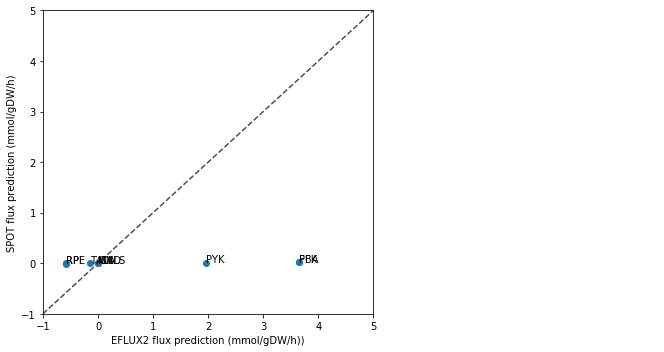

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(EFlux2_flux,SPOT_flux)
ax.set_xlim(-1,5)
ax.set_ylim(-1,5)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
Labels = [i for i in reactionDict]
for i in range(len(reactionDict)):
    if abs(EFlux2_flux[i]-SPOT_flux[i])>1e-4:
        xy = (EFlux2_flux[i],SPOT_flux[i])
        j=i
        display(Labels[j])
        ax.annotate(Labels[j],xy)
plt.xlabel(r'EFLUX2 flux prediction (mmol/gDW/h))')
plt.ylabel(r'SPOT flux prediction (mmol/gDW/h)')
plt.tight_layout()
plt.show()

#### **Compare to OD data** Not finished yet!!!!

In [27]:
spotsol['Growth']

0.0008329641968173913

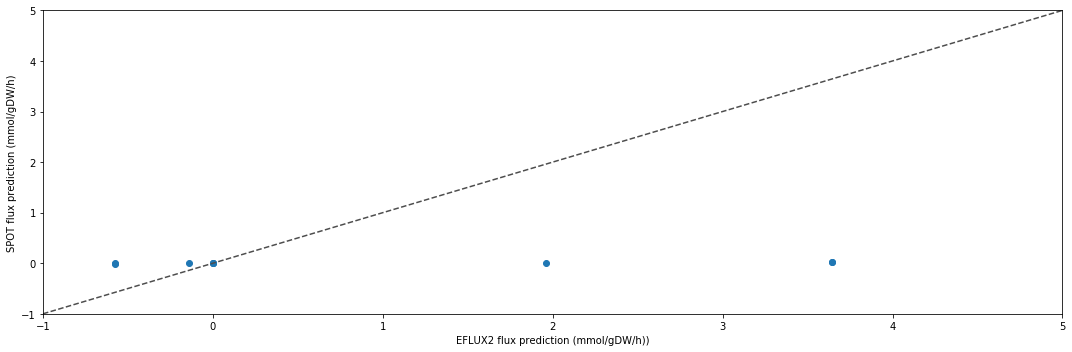

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(EFlux2_flux,SPOT_flux)
ax.set_xlim(-1,5)
ax.set_ylim(-1,5)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
Labels = [i for i in reactionDict]
for i in range(len(reactionDict)):
    if Labels[i]=='Growth':
        xy = (EFlux2_flux[i],SPOT_flux[i])
        j=i
        display(Labels[j])
        ax.annotate(Labels[j],xy)
plt.xlabel(r'EFLUX2 flux prediction (mmol/gDW/h))')
plt.ylabel(r'SPOT flux prediction (mmol/gDW/h)')
plt.tight_layout()
plt.show()